# Exploratory Data Analysis

On original uncleaned filie

go to sa_hkuchatgpt/create_dataset.ipynb

On the dataset_cleaned_heartless.pkl file

In [31]:
# packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# plt style
plt.style.use('seaborn-v0_8-dark')

In [2]:
eda_graphs_path = Path('eda_graphs_2024').resolve()
if not eda_graphs_path.exists():
    eda_graphs_path.mkdir()
print(eda_graphs_path)

/root/FYP/NLP/dev-workspace/sa/eda_graphs_2024


In [3]:
# dataset_original_path = Path('../dataset/sa/dataset.csv').resolve()

# dataset_original = pd.read_csv(dataset_original_path)

# dataset_original['review_text'] = dataset_original['review_text'].astype('str')

# dataset_original = dataset_original.drop_duplicates(keep='first')

In [4]:
dataset_heartless_path = Path('../dataset/sa/dataset_heartless_20240116_sa.pkl').resolve()

dataset = pd.read_pickle(dataset_heartless_path)
# dataset = dataset.sample(frac=p)      # no sampling is needed

# convert the text to string object
dataset['review_text'] = dataset['review_text'].astype('str')

# drop any duplicate just in case
dataset = dataset.drop_duplicates(keep='first')

In [5]:
# create a column counting number of characters in each review
dataset['char_count'] = dataset['review_text'].apply(len)
# dataset_original['char_count'] = dataset_original['review_text'].apply(len)

We will see the ratio between positive and negative reviews

In [6]:
temp = dataset.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
temp.style.background_gradient(cmap='Purples')

,review_score,review_text
0,0,671470
1,1,3281807


In [7]:
# temp2 = dataset_original.groupby('review_score').count()['review_text'].reset_index().sort_values(by='review_score',ascending=True)
# temp2.style.background_gradient(cmap='Purples')

/tmp/ipykernel_14298/2803735290.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Negative','Positive'])


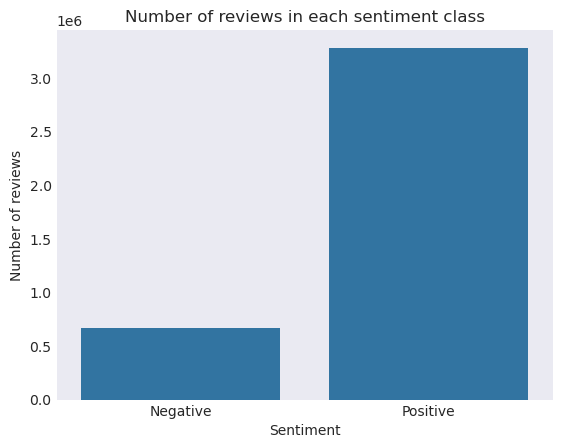

In [10]:
# plot a bar chart with seaborn

plt.style.use('seaborn-v0_8-dark')
ax = sns.barplot(temp, x=['negative','positive'], y='review_text')
ax.set_title('Number of reviews in each sentiment class')
ax.set(xlabel='Sentiment', ylabel='Number of reviews')
ax.set_xticklabels(['Negative','Positive'])

# ax.bar_label(ax.containers[0], fmt='%d', label_type='edge')

# save the plot
fig = ax.get_figure()
fig.savefig(Path.joinpath(eda_graphs_path, 'sentiment_distribution.png'), dpi=300, bbox_inches='tight', facecolor='w')


In [9]:
# print("Ratio between positive and negative comments on original dataset: {:.8}".format(
#     float(len(dataset_original[dataset_original['review_score'] == 1]) / len(dataset_original[dataset_original['review_score'] == -1]))
# ))

# print("Ratio between positive and negative comments on cleaned dataset: {:.8}".format(
#     float(len(dataset[dataset['review_score'] == 1]) / len(dataset[dataset['review_score'] == 0]))
# ))

Ratio between positive and negative comments on original dataset: 4.4717455
Ratio between positive and negative comments on cleaned dataset: 5.1411562


How about the distribution of length of reviews

In both positive and negative comments respectively

We calculate the number of characters and number of words

In [11]:
# first have all comments together

dataset['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    3.953277e+06
mean     6.695605e+01
std      1.120425e+02
min      1.000000e+00
1%       4.000000e+00
10%      7.000000e+00
25%      1.300000e+01
50%      2.900000e+01
75%      7.200000e+01
90%      1.590000e+02
99%      5.620000e+02
max      4.000000e+03
Name: num_of_words, dtype: float64

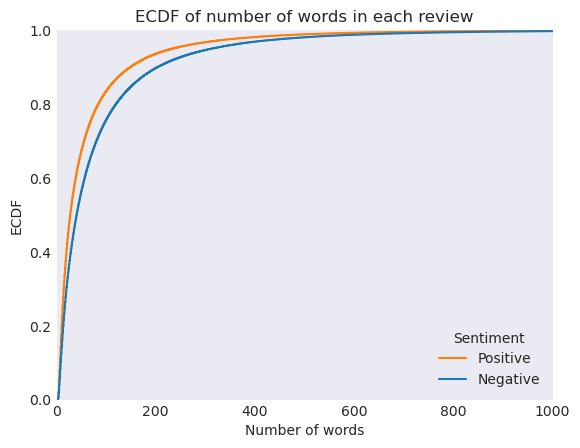

In [30]:
# plot ecdf (empirical cumulative distribution function) (or cumulative frequency graph)

ax = sns.ecdfplot(data=dataset, x='num_of_words', hue='review_score')
ax.set_title('ECDF of number of words in each review')
ax.set(xlabel='Number of words', ylabel='ECDF')

plt.legend(title='Sentiment', loc='lower right', labels=['Positive', 'Negative'])
plt.xlim(0, 1000)
plt.show()

# save the plot
fig = ax.get_figure()
fig.savefig(Path.joinpath(eda_graphs_path, 'ecdf_num_of_words.png'), dpi=300)

In [13]:
dataset_pos_only = dataset[dataset['review_score'] == 1]
dataset_neg_only = dataset[dataset['review_score'] == 0]

In [14]:
# describe the characteristics of the number of words

dataset_pos_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    3.281807e+06
mean     6.318709e+01
std      1.071952e+02
min      1.000000e+00
1%       4.000000e+00
10%      7.000000e+00
25%      1.200000e+01
50%      2.800000e+01
75%      6.800000e+01
90%      1.490000e+02
99%      5.380000e+02
max      4.000000e+03
Name: num_of_words, dtype: float64

<Axes: xlabel='num_of_words', ylabel='Count'>

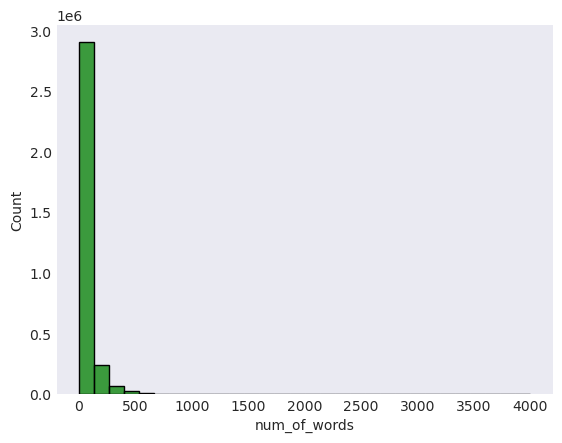

In [15]:
sns.histplot(data=dataset_pos_only, x='num_of_words',bins=30,color='green')

In [16]:
dataset_neg_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    671470.000000
mean         85.376796
std         131.677133
min           1.000000
1%            4.000000
10%           8.000000
25%          17.000000
50%          40.000000
75%          97.000000
90%         204.000000
99%         664.000000
max        1925.000000
Name: num_of_words, dtype: float64

<Axes: xlabel='num_of_words', ylabel='Count'>

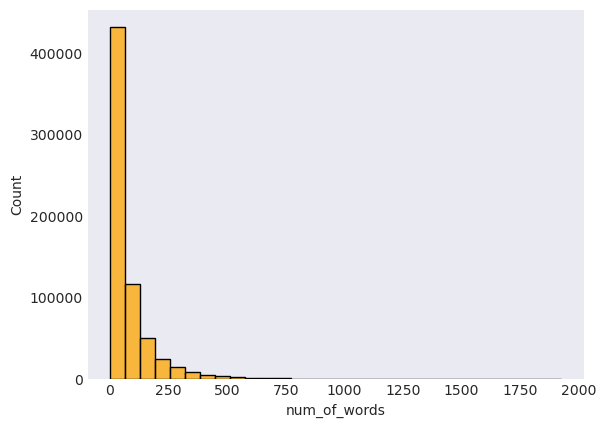

In [17]:
sns.histplot(data=dataset_neg_only, x='num_of_words',bins=30,color='orange')

The public dataset supports the distribution of the comments

- "Negative reviews are slightly longer than positive reviews, but the difference is negligible.". But seems the latter is not supported by the dataset we have.

- "Most games receive reviews with a median length of 205 characters, or 30 words.". The sentence is supported by the positive set and the overall dataset, but not on the negative set.

what if we remove comments less than 20 characters.

In [18]:
dataset_2 = dataset.copy()

number_of_charaters = 20

dataset_2 = dataset_2[dataset_2['review_text'].str.len()>=number_of_charaters]

In [19]:
# first have all comments together

dataset_2['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    3.953277e+06
mean     6.695605e+01
std      1.120425e+02
min      1.000000e+00
1%       4.000000e+00
10%      7.000000e+00
25%      1.300000e+01
50%      2.900000e+01
75%      7.200000e+01
90%      1.590000e+02
99%      5.620000e+02
max      4.000000e+03
Name: num_of_words, dtype: float64

In [20]:
dataset_2_pos_only = dataset_2[dataset_2['review_score'] == 1]
dataset_2_neg_only = dataset_2[dataset_2['review_score'] == 0]

In [21]:
# describe the characteristics of the number of words

dataset_2_pos_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    3.281807e+06
mean     6.318709e+01
std      1.071952e+02
min      1.000000e+00
1%       4.000000e+00
10%      7.000000e+00
25%      1.200000e+01
50%      2.800000e+01
75%      6.800000e+01
90%      1.490000e+02
99%      5.380000e+02
max      4.000000e+03
Name: num_of_words, dtype: float64

<Axes: xlabel='num_of_words', ylabel='Count'>

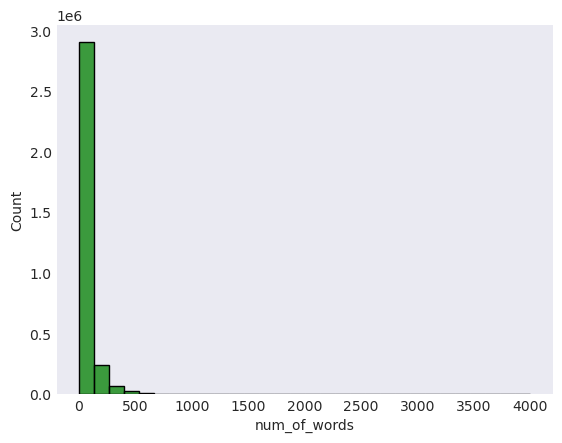

In [22]:
sns.histplot(data=dataset_2_pos_only, x='num_of_words',bins=30,color='green')

In [23]:
dataset_2_neg_only['num_of_words'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count    671470.000000
mean         85.376796
std         131.677133
min           1.000000
1%            4.000000
10%           8.000000
25%          17.000000
50%          40.000000
75%          97.000000
90%         204.000000
99%         664.000000
max        1925.000000
Name: num_of_words, dtype: float64

In [24]:
# select some text for sample

dataset_2_neg_only[dataset_2_neg_only['num_of_words']==645].iloc[0]['review_text']

"After I bought Postal 2, i saw that there was a third one and it had modern-day graphics and i thought that was pretty cool and then I saw all the negative reviews except for the literally only postive review and i thought to myself, hmmm I wonder how bad this game is? Seeing as how the second one was badass and amazingly better than some of the AAA games we get served today, so i bought it, played it and beat it, and now i now why this game is slandered, even RWS has given up on this trainwreck but before i trash this game more i have to say there are parts of this game that are good but far from being awesome.  Like my review of Postal 2, this review will broken down in the same areas  Gameplay, Graphics, Sound and most importantly Story  Warning: this is my opinon and if anything offends you, i deeply apolgize  Gameplay 5/10: the overall gmeplay isn't all to bad, the controls aren't bad but they are a big difference from its predecessor, the main control feature i like about this g

In [25]:
for index, row in dataset_2_pos_only[dataset_2_pos_only['num_of_words'] > 512].sample(n=5).iterrows():
    print("\""+ row['review_text']+ "\",")
    print()

"UPDATED: 12.30.14-----  The New Update is AMAZING!! thank you SO MUCH for taking my requests into consideration, i am now finding plenty of food, water and meds to be able to actually have my own.. survial story ;)  i am terrified of being banned though, i see a lot of people on a daily basis being banned and i have no idea why, or what is going on :( i have contributed a fair sum of $currency$ in donation towards the production of this game title, i even recently opened up my own private server ;) loving that feature hahaha to be able to play quietly alone without PVP activity, just me, my rifle and zombie infested Colorado hahaha very nice, loving the 2 months of freedom, really helping me out a lot!! was expensive, but the GC SALE really helped me afford the luxury, (hoping to see more sales like this going on, in the VERY near future, you will definitely get me as a returning customer for a couple hundred $ for sure!)  with all this being said, this game gets better and better, i 

In [26]:
for index, row in dataset_2_neg_only[dataset_2_neg_only['num_of_words'] > 512].sample(n=5).iterrows():
    print("\""+ row['review_text']+ "\",")
    print()

"While it had potential, this game fell short of expectations. To sum it up  -aliens are either a good time waster or a death sentence. They essentially act like barbarians in CIV V, so really they feel like a cheap reskin. The only difference is that they now kill workers instead of capturing them, which means no rescue missions and more risky early expansions. which brings me to my next point  -Takes forever to make the most basic tile improvements, and there isn't even any good tech or wonders to speed things up. If you lose your workers to aliens or miasma, well it can be difficult to replace  -the miasma mechanic, while intresting, is in my opinion a little backwards. Miasma limits overall growth and the technology to get rid of it is pretty high up.  -All these factors severly limit growth. It honestly feels like the game mechanics have been made to limit how fast people can expand to make the game feel 'bigger' than it actually is,   -Most maps are generally smaller than their C

<Axes: xlabel='num_of_words', ylabel='Count'>

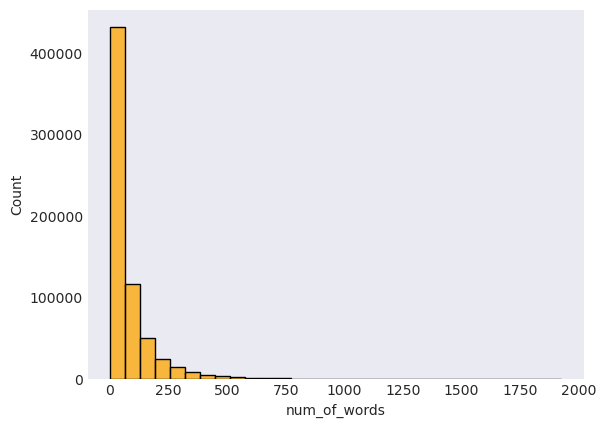

In [27]:
sns.histplot(data=dataset_2_neg_only, x='num_of_words',bins=30,color='orange')

Distribution of words in all review texts

We will perform that with stopwords and w/out stopwords

In [28]:
dataset['list_words'] = dataset['review_text'].apply(lambda x:str(x).split())

In [29]:
top = Counter([item for sublist in dataset['list_words'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,10522743
1,and,7068073
2,a,6647994
3,to,6609069
4,of,5093988
5,is,4697174
6,game,4330362
7,I,4282491
8,you,3990518
9,it,3255977


In [32]:
# create a dataset with cleaning performed

dataset_cleaned = dataset.copy(deep=True)

### remove stopwords

Stopwords are words that occur frequently in a language and are often grammatical in nature, such as articles (e.g., "the," "a"), prepositions (e.g., "in," "on"), conjunctions (e.g., "and," "but"), and pronouns (e.g., "he," "she"). These words are necessary for constructing sentences and conveying grammatical structure, but they often do not contribute much to the overall meaning of the text.

- noise reduction
- Improved Analysis Accuracy
- faster processing

### use stemming to normalize words

Reduce the words to its stem to reduce dimension.
e.g. 

cared ----> care

university ----> univers

fairly ----> fair

easily ----> easili

singing ----> sing

sings ----> sing

sung ----> sung

singer ----> singer

sportingly ----> sport

In [33]:
import str_cleaning_functions

from datasets import Dataset

# func definition see above, also in the str_cleaning_functions.py file

def cleaning(s:str):
    s = str_cleaning_functions.remove_links(s)
    s = str_cleaning_functions.remove_links2(s)
    s = str_cleaning_functions.clean(s)
    s = str_cleaning_functions.deEmojify(s)
    s = str_cleaning_functions.remove_non_letters(s)
    s = s.lower()
    s = str_cleaning_functions.unify_whitespaces(s)
    s = str_cleaning_functions.remove_stopword(s)
    s = str_cleaning_functions.unify_whitespaces(s)
    s = str_cleaning_functions.stemming(s)
    s = str_cleaning_functions.unify_whitespaces(s)
    return s

def cleaning_chunk(hg_dataset):
    return {'review_text2': cleaning(hg_dataset['review_text'])}

In [34]:
temp_dataset = Dataset.from_dict({'review_text': dataset_cleaned['review_text']})
temp_dataset = temp_dataset.map(cleaning_chunk, num_proc=4)
dataset_cleaned['review_text'] = temp_dataset['review_text2']

Map (num_proc=4): 100%|██████████| 3953277/3953277 [05:33<00:00, 11846.98 examples/s]
/root/miniforge3/envs/fyp-test2-wsl/lib/python3.9/site-packages/datasets/table.py:1395: FutureWarning: promote has been superseded by mode='default'.
  block_group = [InMemoryTable(cls._concat_blocks(list(block_group), axis=axis))]
/root/miniforge3/envs/fyp-test2-wsl/lib/python3.9/site-packages/datasets/table.py:1421: FutureWarning: promote has been superseded by mode='default'.
  table = cls._concat_blocks(blocks, axis=0)


In [35]:
dataset_cleaned['list_words'] = dataset_cleaned['review_text'].apply(lambda x:str(x).split())

In [36]:
top2 = Counter([item for sublist in dataset_cleaned['list_words'] for item in sublist])
temp2 = pd.DataFrame(top2.most_common(20))
temp2.columns = ['Common_words','count']
temp2.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,7200481
1,play,2106786
2,like,1474780
3,get,1224335
4,one,1034994
5,good,1000544
6,time,974589
7,fun,952969
8,great,849592
9,realli,845529


<Axes: xlabel='count', ylabel='Common_words'>

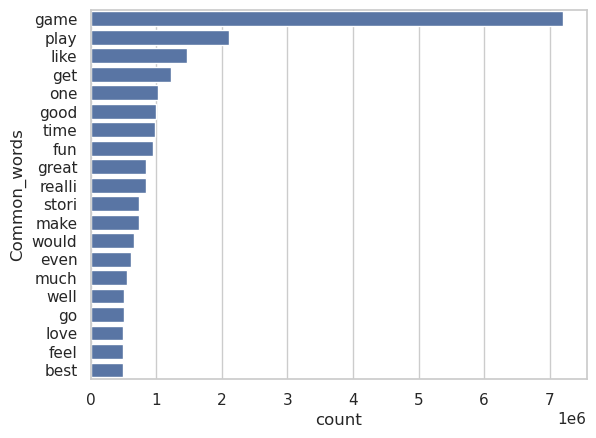

In [37]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp2)

In [38]:
len(Counter({k:c for k,c in top2.items() if c >= 1000}))

5952

In [39]:
# find top 5000 ?

top2.most_common(7000)[-30:]

[('axiom', 723),
 ('afar', 722),
 ('iam', 722),
 ('althought', 722),
 ('unparallel', 722),
 ('wright', 722),
 ('weeaboo', 722),
 ('decal', 721),
 ('undetect', 721),
 ('infus', 721),
 ('vector', 721),
 ('lanc', 721),
 ('mentor', 721),
 ('bid', 721),
 ('pickl', 721),
 ('zombiesth', 721),
 ('troublesom', 720),
 ('del', 720),
 ('akward', 720),
 ('subtleti', 720),
 ('pitfal', 720),
 ('dim', 720),
 ('whoop', 720),
 ('hun', 720),
 ('copper', 719),
 ('pase', 719),
 ('chernobyl', 719),
 ('deffinit', 719),
 ('midget', 718),
 ('flowey', 718)]

If we break into positive and negative comments...

In [40]:
dataset_cleaned_pos_only = dataset_cleaned[dataset_cleaned['review_score'] == 1]
dataset_cleaned_neg_only = dataset_cleaned[dataset_cleaned['review_score'] == 0]

In [41]:
top3 = Counter([item for sublist in dataset_cleaned_pos_only['list_words'] for item in sublist])
temp3 = pd.DataFrame(top3.most_common(20))
temp3.columns = ['Common_words','count']
temp3.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,5759277
1,play,1718679
2,like,1168540
3,get,940747
4,one,852344
5,good,842329
6,fun,837099
7,great,775291
8,time,760950
9,realli,673990


<Axes: xlabel='count', ylabel='Common_words'>

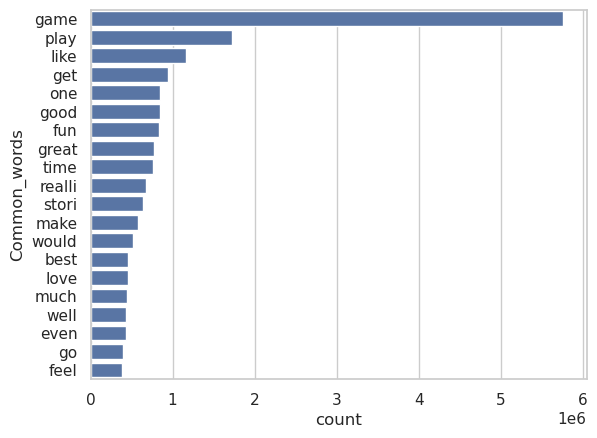

In [42]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp3)

In [43]:
top4 = Counter([item for sublist in dataset_cleaned_neg_only['list_words'] for item in sublist])
temp4 = pd.DataFrame(top4.most_common(20))
temp4.columns = ['Common_words','count']
temp4.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,1441204
1,play,388107
2,like,306240
3,get,283588
4,time,213639
5,even,186807
6,one,182650
7,realli,171539
8,good,158215
9,make,157351


<Axes: xlabel='count', ylabel='Common_words'>

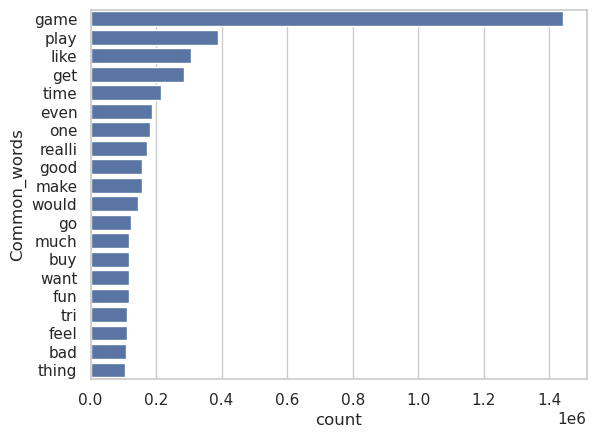

In [44]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp4)

what are the common words appeared in both top 20?

In [45]:
temp5 = pd.merge(temp3,temp4, how='inner', on=['Common_words'])

In [46]:
temp5

,Common_words,count_x,count_y
0,game,5759277,1441204
1,play,1718679,388107
2,like,1168540,306240
3,get,940747,283588
4,one,852344,182650
5,good,842329,158215
6,fun,837099,115870
7,time,760950,213639
8,realli,673990,171539
9,make,573899,157351


looks almost the same as the overall dataset, as the positive comments are very domainant...

Wordcloud generation (on whole dataset)

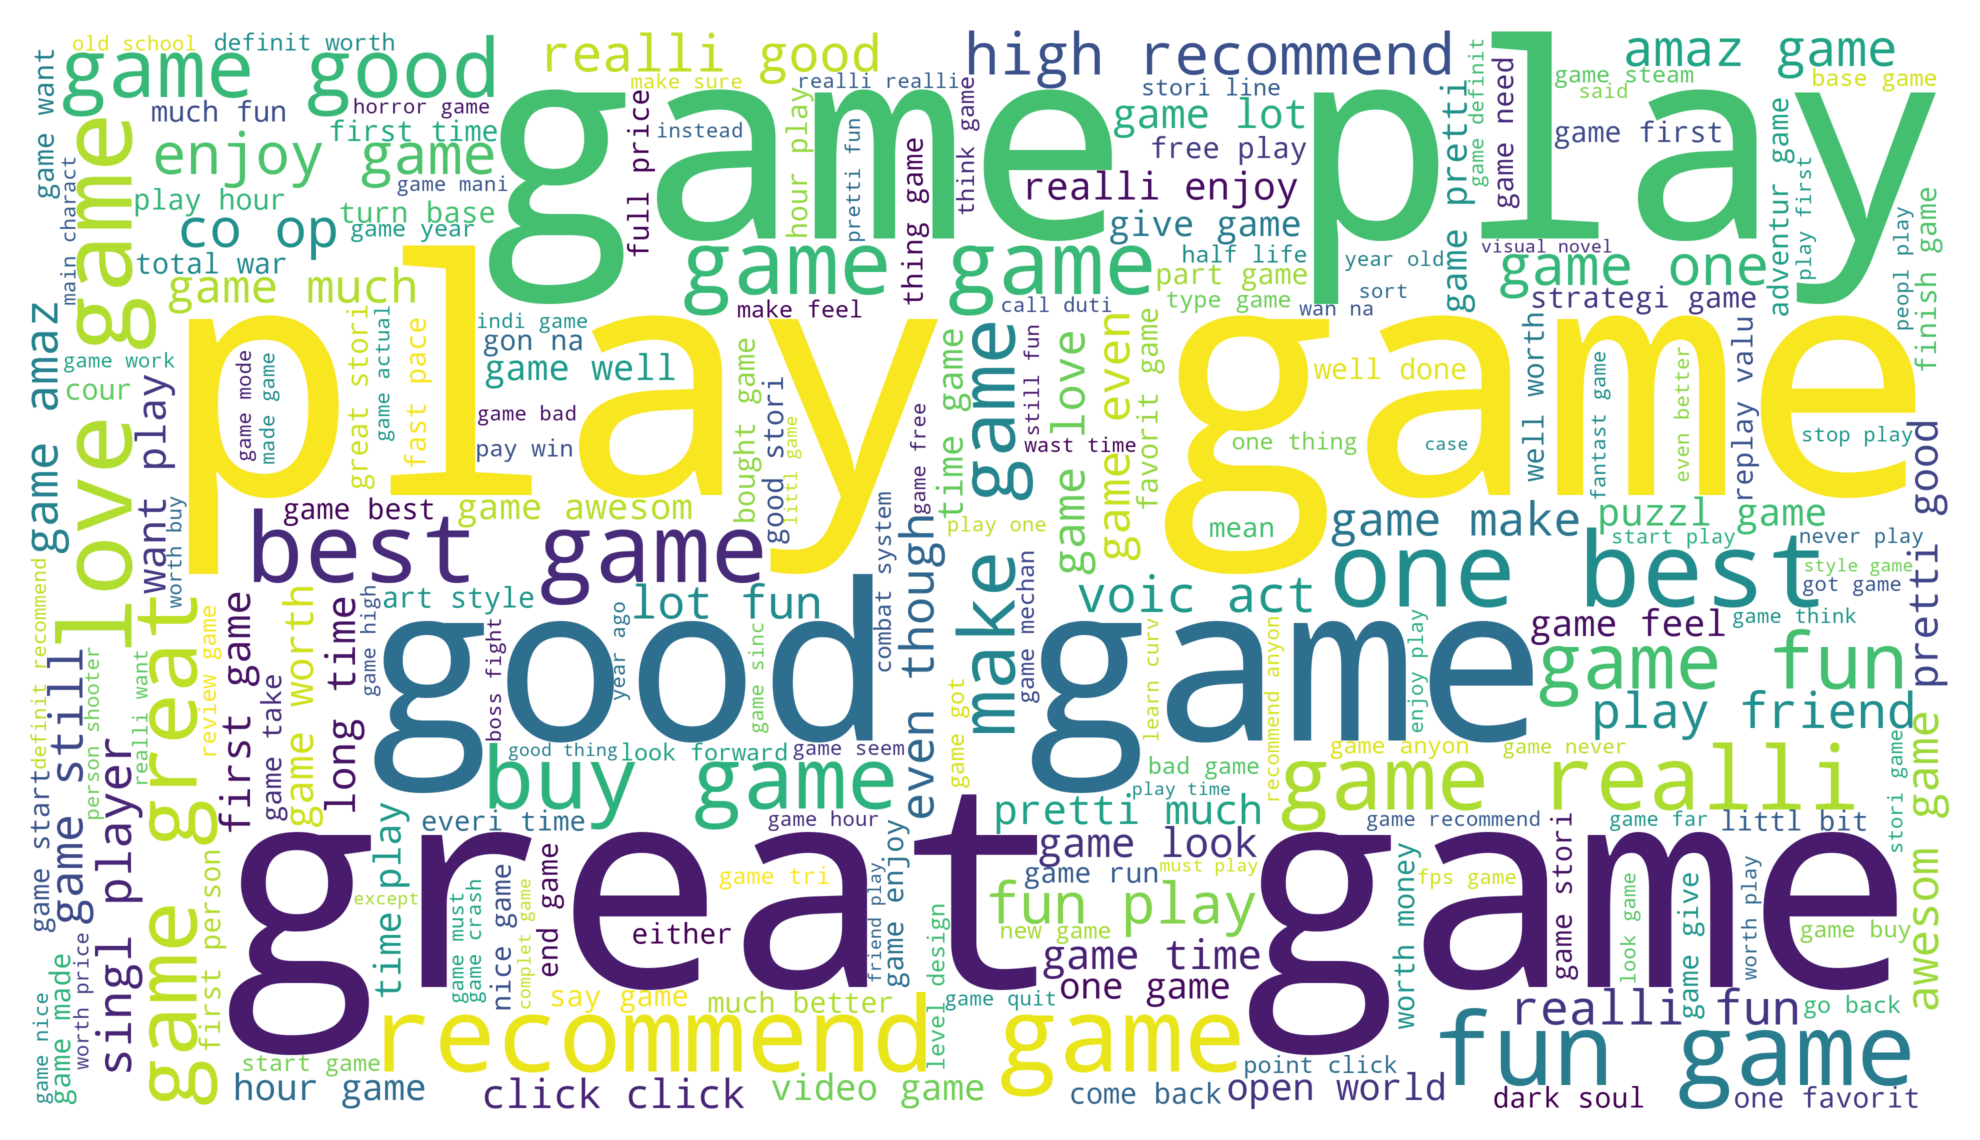

<Figure size 640x480 with 0 Axes>

In [47]:
txt_wholedataset = ' '.join(t for t in dataset_cleaned['review_text'])
plt.figure(dpi=300)

wordcloud = WordCloud(
    max_words=200,
    width=3840,
    height=2160,
    background_color="white"
    ).generate(txt_wholedataset)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# save plot

plt.savefig(Path.joinpath(eda_graphs_path, 'wordcloud_wholedataset.png'), dpi=300, bbox_inches='tight')

In [48]:
# save the wordcloud as png
with open(Path.joinpath(eda_graphs_path, 'wordcloud_wholedataset.svg'), 'w') as f:
    f.write(wordcloud.to_svg())

wordcloud.to_file(Path.joinpath(eda_graphs_path, 'wordcloud_wholedataset.png'))

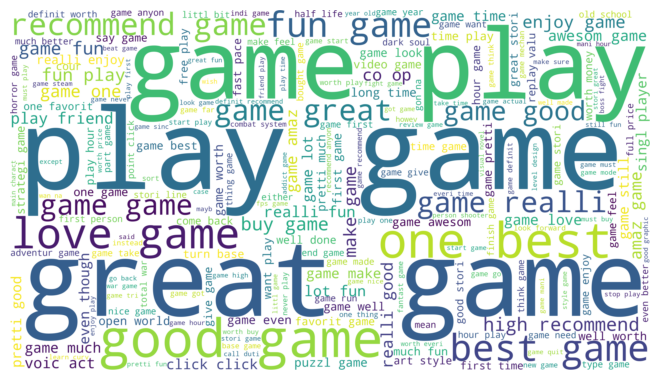

In [53]:
# plot for positive reviews

txt_pos = ' '.join(t for t in dataset_cleaned_pos_only['review_text'])

wordcloud_pos = WordCloud(
    max_words=200,
    width=3840,
    height=2160,
    background_color="white"
    ).generate(txt_pos)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# save plot
# plt.savefig(Path.joinpath(eda_graphs_path, 'wordcloud_pos.png'), dpi=300, bbox_inches='tight')

with open(Path.joinpath(eda_graphs_path, 'wordcloud_pos.svg'), 'w') as f:
    f.write(wordcloud_pos.to_svg())
wordcloud.to_file(Path.joinpath(eda_graphs_path, 'wordcloud_pos.png'))

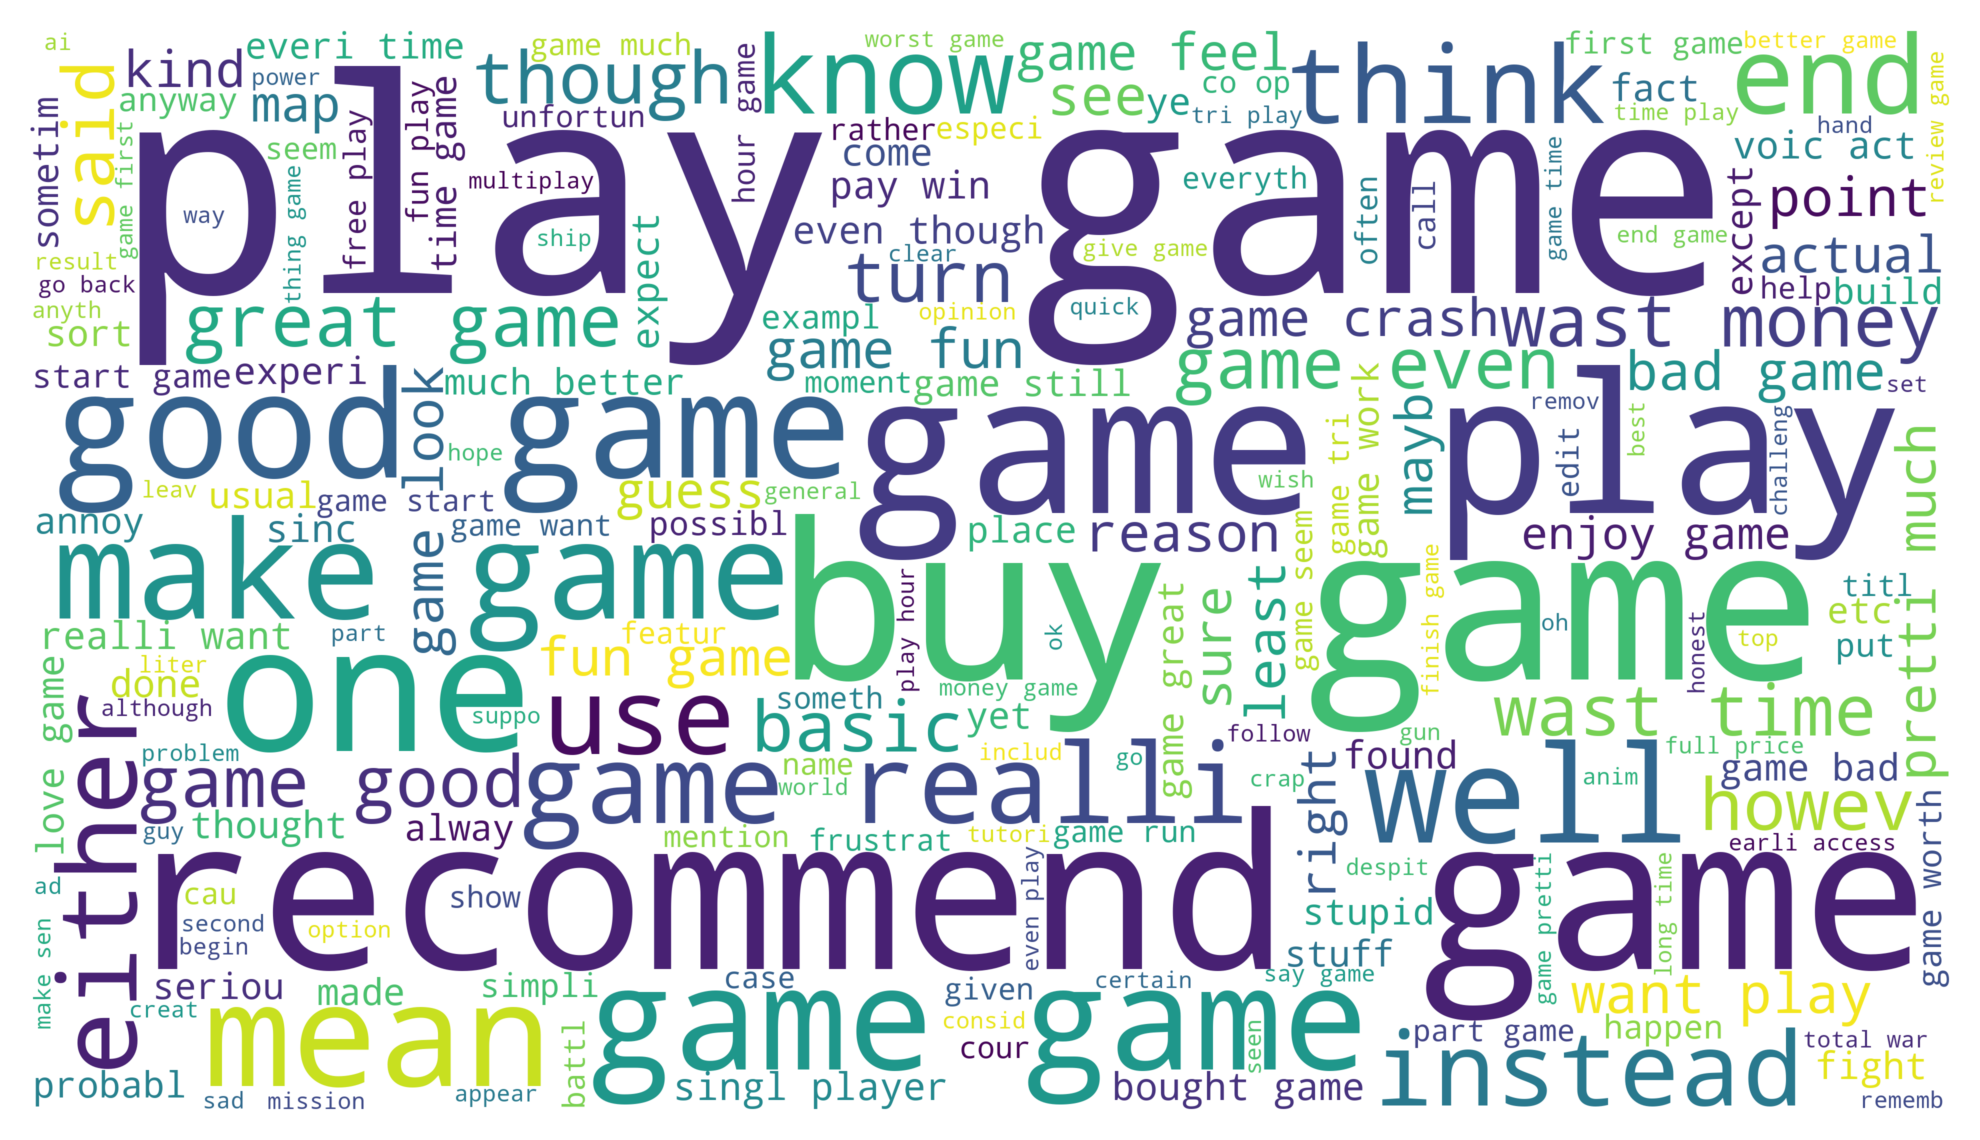

In [54]:
# plot for negative reviews

txt_neg = ' '.join(t for t in dataset_cleaned_neg_only['review_text'])
plt.figure(dpi=300)

wordcloud_neg = WordCloud(
    max_words=200,
    width=3840,
    height=2160,
    background_color="white"
    ).generate(txt_neg)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# plt.savefig(Path.joinpath(eda_graphs_path, 'wordcloud_neg.png'), dpi=300, bbox_inches='tight')
# save plot
with open(Path.joinpath(eda_graphs_path, 'wordcloud_neg.svg'), 'w') as f:
    f.write(wordcloud_neg.to_svg())
wordcloud_neg.to_file(Path.joinpath(eda_graphs_path, 'wordcloud_neg.png'))


Due to hardware limitation, we will create a balanced dataset by randomly sampling positive comments in training

There are different methods in randomly selecting samples, yet the difference in performance are not significant (~0.01 in accuracy)  
E.g.: https://ruslanmv.com/blog/How-to-handle-imbalanced-text-data-in-Natural-Language-Processing

The undersampler in imbalanced-learning package will be applied on the training set

Then we may scrap new comments for validation on recent comments :D